**Mount Google Drive to Collaboratory:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Imports**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

**Read Dataset**

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/DAV_Paper/final_data.csv")
data.iloc[:5,11:]

,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,21.0,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,22.3,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,21.5,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,24.5,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,28.0,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


# Classification

**Logistic Regression**



Model score: 0.967
Accuracy: 0.9668674698795181
Precision: 0.9668687090311405
Recall: 0.9668674698795181
F1 score: 0.9668634848368817


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       358
           1       0.95      0.95      0.95       334
           2       0.97      0.96      0.96       304

    accuracy                           0.97       996
   macro avg       0.97      0.97      0.97       996
weighted avg       0.97      0.97      0.97       996





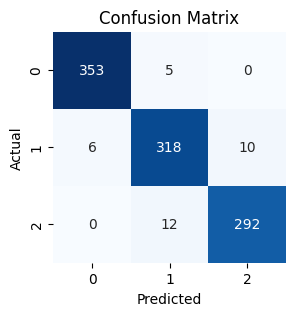

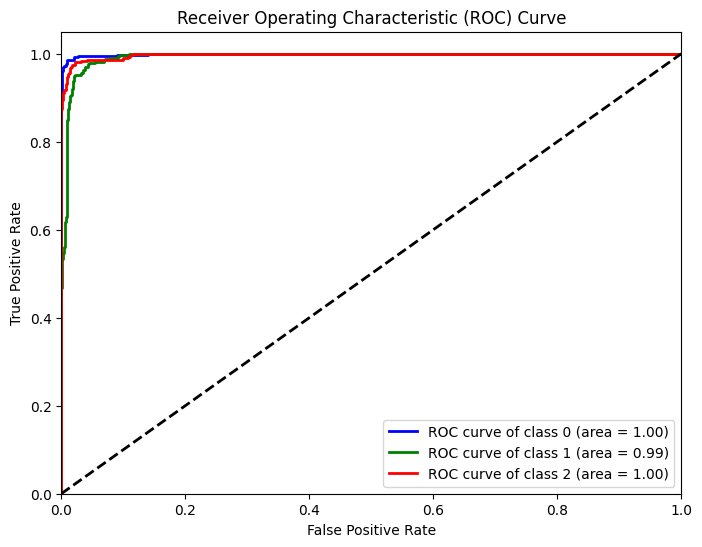

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

low_threshold = 60
high_threshold = 70

def classify_sustainability_index(score):
    if score >= high_threshold:
        return 2
    elif score <= low_threshold:
        return 0
    else:
        return 1

target_classes = target.apply(classify_sustainability_index)

X_train, X_test, y_train, y_test = train_test_split(features, target_classes, test_size=0.25, random_state=0)

logreg = LogisticRegression(max_iter=3000)
model = logreg.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")

print("Classification report:")
print(metrics.classification_report(y_test, y_pred))
print("\n")

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

y_prob = model.predict_proba(X_test)

# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Decision Tree**



Model score: 0.960
Accuracy: 0.9598393574297188
Precision: 0.9600374201422824
Recall: 0.9598393574297188
F1 score: 0.9599091181573446


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       358
           1       0.93      0.95      0.94       334
           2       0.96      0.97      0.97       304

    accuracy                           0.96       996
   macro avg       0.96      0.96      0.96       996
weighted avg       0.96      0.96      0.96       996





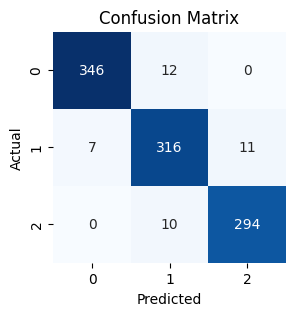

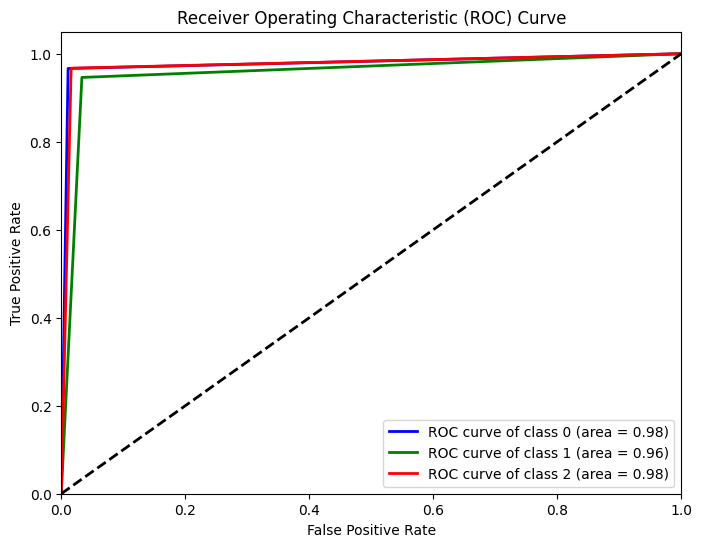

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

low_threshold = 60
high_threshold = 70

def classify_sustainability_index(score):
    if score >= high_threshold:
        return 2
    elif score <= low_threshold:
        return 0
    else:
        return 1

target_classes = target.apply(classify_sustainability_index)

X_train, X_test, y_train, y_test = train_test_split(features, target_classes, test_size=0.25, random_state=0)

dt_classifier = DecisionTreeClassifier(random_state=0)
model = dt_classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")

print("Classification report:")
print(metrics.classification_report(y_test, y_pred))
print("\n")

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Support Vector Machines (SVM)**



Model score: 0.872
Accuracy: 0.8724899598393574
Precision: 0.8936688036123339
Recall: 0.8724899598393574
F1 score: 0.8753300652652755


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       358
           1       0.74      0.95      0.83       334
           2       0.96      0.81      0.88       304

    accuracy                           0.87       996
   macro avg       0.89      0.87      0.87       996
weighted avg       0.89      0.87      0.88       996





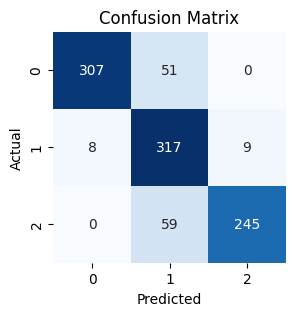

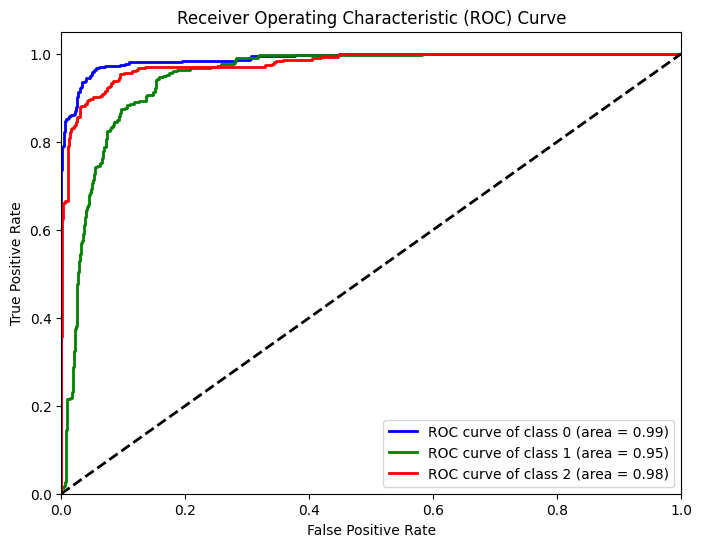

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

low_threshold = 60
high_threshold = 70

def classify_sustainability_index(score):
    if score >= high_threshold:
        return 2
    elif score <= low_threshold:
        return 0
    else:
        return 1

target_classes = target.apply(classify_sustainability_index)

X_train, X_test, y_train, y_test = train_test_split(features, target_classes, test_size=0.25, random_state=0)

svm_classifier = svm.SVC(probability=True, random_state=0)

model = svm_classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")

print("Classification report:")
print(metrics.classification_report(y_test, y_pred))
print("\n")

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Multi-Layer Perceptron (MLP)**



Model score: 0.913
Accuracy: 0.9126506024096386
Precision: 0.9207973964063337
Recall: 0.9126506024096386
F1 score: 0.9099712696784648


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       358
           1       0.98      0.76      0.85       334
           2       0.84      0.99      0.91       304

    accuracy                           0.91       996
   macro avg       0.92      0.91      0.91       996
weighted avg       0.92      0.91      0.91       996





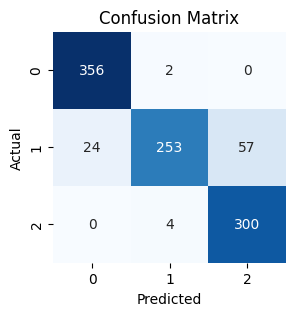

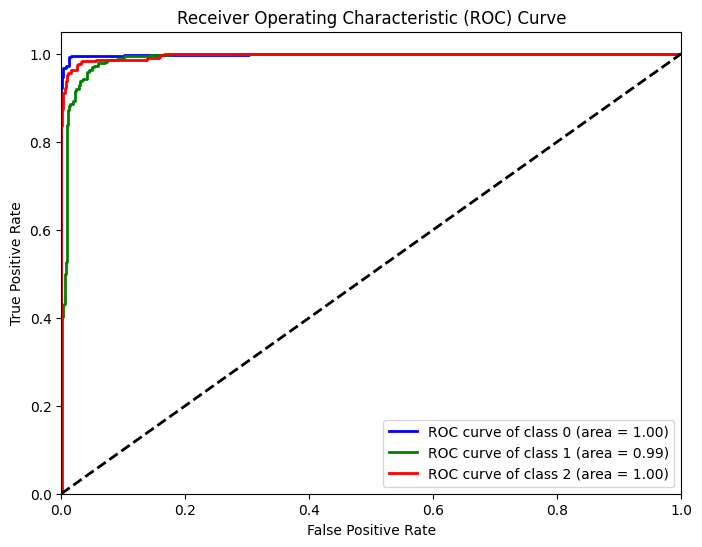

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

low_threshold = 60
high_threshold = 70

def classify_sustainability_index(score):
    if score >= high_threshold:
        return 2
    elif score <= low_threshold:
        return 0
    else:
        return 1

target_classes = target.apply(classify_sustainability_index)

X_train, X_test, y_train, y_test = train_test_split(features, target_classes, test_size=0.25, random_state=0)

mlp_classifier = MLPClassifier(random_state=0)

model = mlp_classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))
print("\n")

print("Classification report:")
print(metrics.classification_report(y_test, y_pred))
print("\n")

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Prediction

**MLP**



Model score: 0.993
Mean Absolute Error: 0.6601013522949991
Mean Squared Error: 0.7939067513663411
The R squared value: 0.9934068508198609




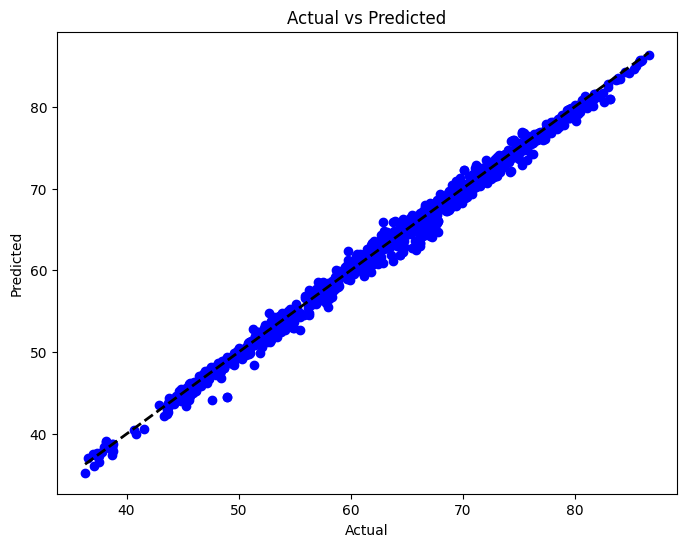

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

mlp_regressor = MLPRegressor(random_state=0)

model = mlp_regressor.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("The R squared value:", metrics.r2_score(y_test, y_pred))
print("\n")

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

**Desicion Tree**



Model score: 0.990
Mean Absolute Error: 0.6674379276506022
Mean Squared Error: 1.1896811379242527
The R squared value: 0.9901200673685759




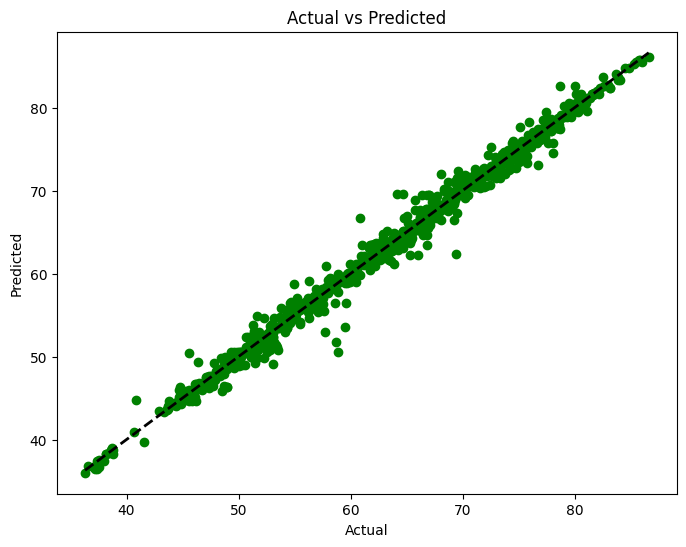

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

dt_regressor = DecisionTreeRegressor(random_state=0)

model = dt_regressor.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("The R squared value:", metrics.r2_score(y_test, y_pred))
print("\n")

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

**Linear Regression**



Model score: 0.990
Mean Absolute Error: 0.860198752106598
Mean Squared Error: 1.2233962051073723
The R squared value: 0.9898400741991336




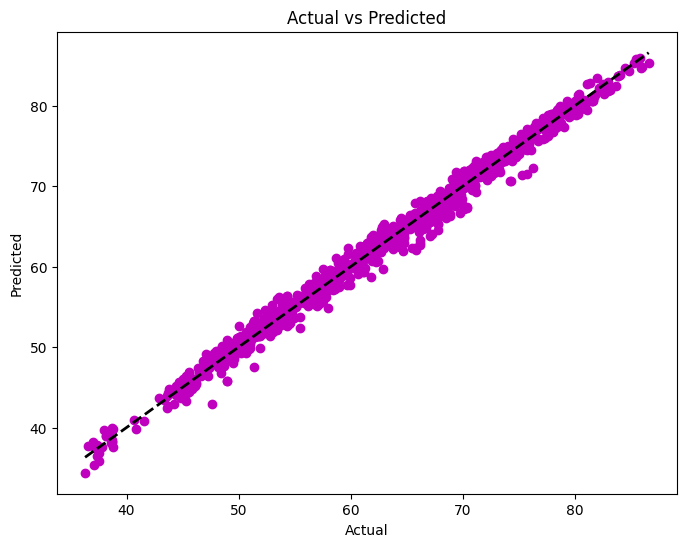

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

linreg = LinearRegression()

model = linreg.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("The R squared value:", metrics.r2_score(y_test, y_pred))
print("\n")

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='m')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

**SVR**



Model score: 0.986
Mean Absolute Error: 1.0001230961147467
Mean Squared Error: 1.7145705883689066
The R squared value: 0.985761023382734




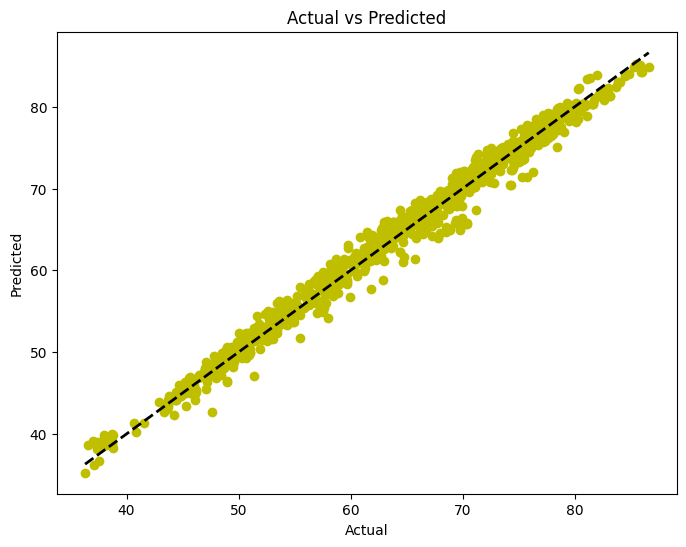

In [ ]:
features = data[['year', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
                 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score',
                 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score',
                 'goal_16_score', 'goal_17_score']]
target = data['sdg_index_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

svm_regressor = svm.SVR(kernel='linear')

model = svm_regressor.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n")
print("Model score: %.3f" % model.score(X_test, y_test))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("The R squared value:", metrics.r2_score(y_test, y_pred))
print("\n")

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()